# DAT210x - Programming with Python for DS

## Module5- Lab1

Start by importing whatever you need to import in order to make this lab work:

In [0]:
import pandas as pd
from scipy import misc
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### How to Get The Dataset

1. Open up the City of Chicago's [Open Data | Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) page.
1. In the `Primary Type` column, click on the `Menu` button next to the info button, and select `Filter This Column`. It might take a second for the filter option to show up, since it has to load the entire list first.
1. Scroll down to `GAMBLING`
1. Click the light blue `Export` button next to the `Filter` button, and select `Download As CSV`

Now that you have th dataset stored as a CSV, load it up being careful to double check headers, as per usual:

In [0]:
df = pd.read_csv("crimes.csv", header=0, index_col="ID")


Get rid of any _rows_ that have nans in them:

In [0]:
df.dropna(how="any", axis=0, inplace=True)

Display the `dtypes` of your dset:

In [30]:
df.dtypes

Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

Coerce the `Date` feature (which is currently a string object) into real date, and confirm by displaying the `dtypes` again. This might be a slow executing process...

In [0]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
# Filter dates for second plot
df = df[df["Date"] > '2011-01-01']

In [38]:
df

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
10002677,HY191890,2015-03-20 13:13:00,020XX W 70TH ST,1661,GAMBLING,GAME/DICE,STREET,True,False,735,...,17.0,67.0,19,1164027.0,1858234.0,2015,02/10/2018 03:50:01 PM,41.766615,-87.674337,"(41.766615006, -87.674337321)"
10003802,HY193541,2015-03-21 18:45:00,042XX W MONROE ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,1115,...,28.0,26.0,19,1148136.0,1899324.0,2015,02/10/2018 03:50:01 PM,41.879691,-87.731530,"(41.879691121, -87.731529667)"
10003937,HY193663,2015-03-21 19:55:00,032XX W LAWRENCE AVE,1670,GAMBLING,GAME/AMUSEMENT DEVICE,SMALL RETAIL STORE,True,False,1713,...,39.0,14.0,19,1154071.0,1931710.0,2015,02/10/2018 03:50:01 PM,41.968445,-87.708871,"(41.968444682, -87.708871059)"
10004429,HY194332,2015-03-22 13:57:00,019XX S ST LOUIS AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,1024,...,24.0,29.0,19,1153407.0,1890195.0,2015,02/10/2018 03:50:01 PM,41.854537,-87.712418,"(41.854537081, -87.71241763)"
10005837,HY195964,2015-03-23 20:40:00,039XX W CERMAK RD,1661,GAMBLING,GAME/DICE,PARKING LOT/GARAGE(NON.RESID.),True,False,1014,...,24.0,29.0,19,1150290.0,1889088.0,2015,02/10/2018 03:50:01 PM,41.851561,-87.723887,"(41.851560618, -87.723887245)"
10011726,HY200956,2015-03-27 09:10:00,032XX N HARLEM AVE,1670,GAMBLING,GAME/AMUSEMENT DEVICE,OTHER,True,False,1631,...,36.0,17.0,19,1127514.0,1920675.0,2015,02/10/2018 03:50:01 PM,41.938653,-87.806771,"(41.938653007, -87.80677086)"
10012328,HY201988,2015-03-28 18:45:00,005XX N SPRINGFIELD AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,1122,...,27.0,23.0,19,1150294.0,1903297.0,2015,02/10/2018 03:50:01 PM,41.890552,-87.723502,"(41.890551663, -87.723502064)"
10014339,HY203868,2015-03-30 14:19:00,038XX W ROOSEVELT RD,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,1011,...,24.0,29.0,19,1150993.0,1894437.0,2015,02/10/2018 03:50:01 PM,41.866225,-87.721167,"(41.866225191, -87.721167065)"
10016050,HY205430,2015-03-31 19:05:00,060XX S PRINCETON AVE,1661,GAMBLING,GAME/DICE,ALLEY,True,False,711,...,20.0,68.0,19,1175318.0,1865091.0,2015,02/10/2018 03:50:01 PM,41.785187,-87.632747,"(41.785186531, -87.632746831)"


In [0]:
def doKMeans(df):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    df = df[['Longitude', 'Latitude']]
    


    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    #
    model=KMeans(n_clusters=7)
    model.fit(df)
    KMeans(copy_x=True, max_iter=300, n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    #print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    plt.show()

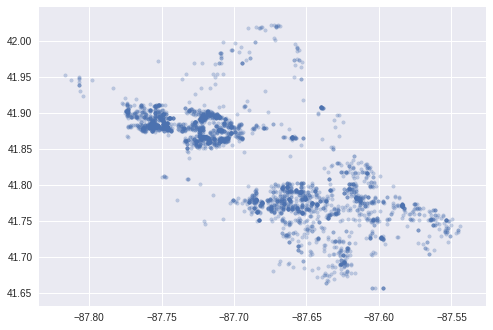

In [40]:
# Print & Plot your data
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

[[-87.71102014  41.87570651]
 [-87.66587618  41.77593875]
 [-87.75510054  41.89012282]
 [-87.62004952  41.79027369]
 [-87.6868321   41.98345852]
 [-87.63441336  41.70608757]
 [-87.57999544  41.75063949]]


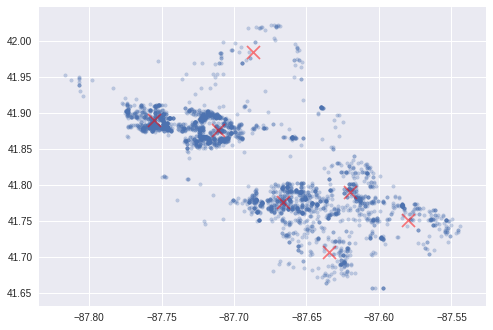

In [41]:
# Print & Plot your data
doKMeans(df)

Filter out the data so that it only contains samples that have a `Date > '2011-01-01'`, using indexing. Then, in a new figure, plot the crime incidents, as well as a new K-Means run's centroids.

In [27]:
df

,Longitude,Latitude
ID,,
10002677,-87.674337,41.766615
10003802,-87.731530,41.879691
10003937,-87.708871,41.968445
10004429,-87.712418,41.854537
10005837,-87.723887,41.851561
10011726,-87.806771,41.938653
10012328,-87.723502,41.890552
10014339,-87.721167,41.866225
10016050,-87.632747,41.785187
